In [1]:
import pandas as pd
import numpy as np
import math
import random
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.subplots as sp
import plotly.graph_objects as go
import plotly.offline as py
import seaborn as sb
import sklearn
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV, LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.metrics import mean_squared_error, classification_report, confusion_matrix, accuracy_score, precision_recall_fscore_support, roc_curve, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.multiclass import OneVsOneClassifier
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs, make_moons
from sklearn.neural_network import MLPClassifier
from scipy.spatial import Voronoi, voronoi_plot_2d

from joblib import Parallel, delayed

In [95]:
def load_data(useDataTime = False, useCopy=False):
    if useCopy:
        df = pd.read_csv(f'.\\results\\Nuovo documento di testo.csv')
        df['filter_millis'] = (df['filter_exec_time']/1000)#.apply(math.floor)
        df['data_millis'] = (df['data_exec_time']/1000)#.apply(math.floor)
        df['total_millis'] = df['filter_millis'] + (df['data_millis'] if useDataTime else 0)
    else:
        df = pd.read_csv(f'.\\results\\exec copy.csv')
        df['total_millis'] = df['exec_time']/1000

    return df

In [32]:
df.to_csv('.\\results\\exec.csv', index=False)


In [121]:
df = load_data(True,True)
df

,img_name,img_w,img_h,filter,mode,filter_exec_time,data_exec_time,kernel_size,filter_millis,data_millis,total_millis
0,04_bryce.jpg,10000,6000,sharpen,global,68666,1082068,32.0,68.666,1082.068,1150.734
1,04_bryce.jpg,10000,6000,sharpen,global,68725,1058379,32.0,68.725,1058.379,1127.104
2,04_bryce.jpg,10000,6000,sharpen,global,68943,1012616,32.0,68.943,1012.616,1081.559
3,04_bryce.jpg,10000,6000,sharpen,global,68964,1058822,32.0,68.964,1058.822,1127.786
4,04_bryce.jpg,10000,6000,sharpen,shared,36588,1033579,32.0,36.588,1033.579,1070.167
...,...,...,...,...,...,...,...,...,...,...,...
112,04_bryce.jpg,10000,6000,sharpen,global,70259,1058015,16.0,70.259,1058.015,1128.274
113,02_galaxy.jpg,1280,720,sharpen,shared,902,367075,16.0,0.902,367.075,367.977
114,02_galaxy.jpg,1280,720,sharpen,constant,1034,1638,16.0,1.034,1.638,2.672
115,02_galaxy.jpg,1280,720,sharpen,global,2529,729435,16.0,2.529,729.435,731.964


In [122]:
df1 = load_data(True)
df1

,img_name,img_w,img_h,filter,mode,exec_time,kernel_size,total_millis
0,01_lenna.png,512,512,sharpen,sequential,101917,32,101.917
1,03_shinjuku.png,4096,2304,sharpen,sequential,3741032,32,3741.032
2,04_bryce.jpg,10000,6000,sharpen,sequential,19841536,32,19841.536
3,02_galaxy.jpg,1280,720,sharpen,sequential,301781,32,301.781
4,00_original.png,100,100,sharpen,sequential,3823,32,3.823
...,...,...,...,...,...,...,...,...
608,02_galaxy.jpg,1280,720,sharpen,constant,311713,8,311.713
609,04_bryce.jpg,10000,6000,sharpen,constant,863883,8,863.883
610,00_original.png,100,100,sharpen,constant,167987,8,167.987
611,03_shinjuku.png,4096,2304,sharpen,constant,253061,8,253.061


In [123]:
df['exec_time'] = [0]*len(df)

df1['data_exec_time'] = [0]*len(df1)
df1['filter_exec_time'] = [0]*len(df1)

df1['filter_millis'] = [0]*len(df1)
df1['data_millis'] = [0]*len(df1)

df1

,img_name,img_w,img_h,filter,mode,exec_time,kernel_size,total_millis,data_exec_time,filter_exec_time,filter_millis,data_millis
0,01_lenna.png,512,512,sharpen,sequential,101917,32,101.917,0,0,0,0
1,03_shinjuku.png,4096,2304,sharpen,sequential,3741032,32,3741.032,0,0,0,0
2,04_bryce.jpg,10000,6000,sharpen,sequential,19841536,32,19841.536,0,0,0,0
3,02_galaxy.jpg,1280,720,sharpen,sequential,301781,32,301.781,0,0,0,0
4,00_original.png,100,100,sharpen,sequential,3823,32,3.823,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
608,02_galaxy.jpg,1280,720,sharpen,constant,311713,8,311.713,0,0,0,0
609,04_bryce.jpg,10000,6000,sharpen,constant,863883,8,863.883,0,0,0,0
610,00_original.png,100,100,sharpen,constant,167987,8,167.987,0,0,0,0
611,03_shinjuku.png,4096,2304,sharpen,constant,253061,8,253.061,0,0,0,0


In [124]:
a = pd.concat([df, df1])
df = a

# EXEC TIME

In [125]:
temp_ = df
temp_

,img_name,img_w,img_h,filter,mode,filter_exec_time,data_exec_time,kernel_size,filter_millis,data_millis,total_millis,exec_time
0,04_bryce.jpg,10000,6000,sharpen,global,68666,1082068,32.0,68.666,1082.068,1150.734,0
1,04_bryce.jpg,10000,6000,sharpen,global,68725,1058379,32.0,68.725,1058.379,1127.104,0
2,04_bryce.jpg,10000,6000,sharpen,global,68943,1012616,32.0,68.943,1012.616,1081.559,0
3,04_bryce.jpg,10000,6000,sharpen,global,68964,1058822,32.0,68.964,1058.822,1127.786,0
4,04_bryce.jpg,10000,6000,sharpen,shared,36588,1033579,32.0,36.588,1033.579,1070.167,0
...,...,...,...,...,...,...,...,...,...,...,...,...
608,02_galaxy.jpg,1280,720,sharpen,constant,0,0,8.0,0.000,0.000,311.713,311713
609,04_bryce.jpg,10000,6000,sharpen,constant,0,0,8.0,0.000,0.000,863.883,863883
610,00_original.png,100,100,sharpen,constant,0,0,8.0,0.000,0.000,167.987,167987
611,03_shinjuku.png,4096,2304,sharpen,constant,0,0,8.0,0.000,0.000,253.061,253061


In [227]:
asd = pd.read_csv('.\\results\\exec copy.csv')
asd

,img_name,img_w,img_h,filter,mode,exec_time,kernel_size
0,01_lenna.png,512,512,sharpen,sequential,101917,32
1,03_shinjuku.png,4096,2304,sharpen,sequential,3741032,32
2,04_bryce.jpg,10000,6000,sharpen,sequential,19841536,32
3,02_galaxy.jpg,1280,720,sharpen,sequential,301781,32
4,00_original.png,100,100,sharpen,sequential,3823,32
...,...,...,...,...,...,...,...
608,02_galaxy.jpg,1280,720,sharpen,constant,311713,8
609,04_bryce.jpg,10000,6000,sharpen,constant,863883,8
610,00_original.png,100,100,sharpen,constant,167987,8
611,03_shinjuku.png,4096,2304,sharpen,constant,253061,8


In [236]:

print(asd.loc[(asd['mode']=='constant') & (asd['img_name']=='04_bryce.jpg')]['exec_time'].mean())
print(asd.loc[(asd['mode']=='shared') & (asd['img_name']=='04_bryce.jpg')]['exec_time'].mean())
asd['total_millis'] = asd['exec_time']/1000
asd
df = asd

925819.3870967742
852615.5161290322


In [233]:
qwert = df

In [185]:
df = temp_

constant {'00_original.png': 228.30087096774187, '01_lenna.png': 358.5609032258065, '02_galaxy.jpg': 279.96770967741935, '03_shinjuku.png': 843.4956060606061, '04_bryce.jpg': 925.8193870967742}
global {'00_original.png': 255.39649999999997, '01_lenna.png': 289.24129032258065, '02_galaxy.jpg': 344.7151999999999, '03_shinjuku.png': 508.41839999999996, '04_bryce.jpg': 900.8313333333334}
shared {'00_original.png': 279.1285806451613, '01_lenna.png': 264.5972258064516, '02_galaxy.jpg': 308.8828064516129, '03_shinjuku.png': 557.9917741935485, '04_bryce.jpg': 852.6155161290324}


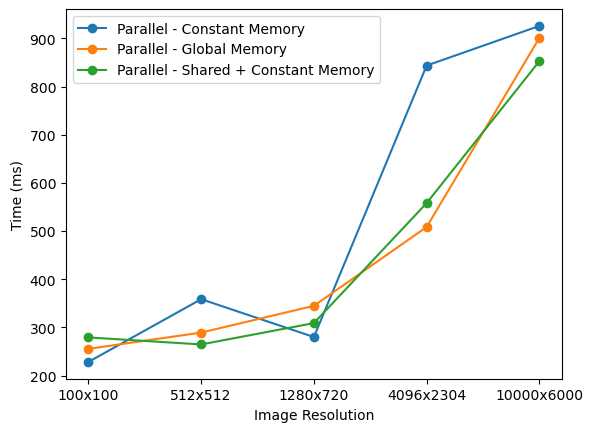

In [237]:
# df = load_data(False,True)
modes = list(set(df['mode']))
modes = ['constant', 'sequential', 'global', 'shared']
modes = ['constant', 'global', 'shared']

name_to_res ={'04_bryce.jpg':'10000x6000', '00_original.png': '100x100','01_lenna.png':'512x512','02_galaxy.jpg': '1280x720', '03_shinjuku.png': '4096x2304',}
mode_to_legend = {'sequential' : 'Sequential',   'constant':'Parallel - Constant Memory', 'global' : 'Parallel - Global Memory','shared':'Parallel - Shared + Constant Memory'}
kernel_size = 0

exec_times = {}
for mode in modes:
    temp = {}
    for file in set(df['img_name']):
        w = df.loc[(df['mode']==mode) & (df['img_name']==file)]['img_w'].iloc[0]
        h = df.loc[(df['mode']==mode) & (df['img_name']==file)]['img_h'].iloc[0]
        # print(w, h)
        # temp[file] = np.mean(df.loc[(df['mode']==mode) & (df['img_name']==file) & (df['kernel_size']==kernel_size)]['total_millis'])
        temp[file] = np.mean(df.loc[(df['mode']==mode) & (df['img_name']==file) & ((df['kernel_size']==kernel_size) if (kernel_size != 0 and mode != 'sequential') else True)]['total_millis'])
        # temp[file] = (np.mean(df.loc[(df['mode']==mode) & (df['img_name']==file) & ((df['kernel_size']==kernel_size) if kernel_size != 0 else True)]['total_millis'])+10)*1.5
        # temp[file] = np.mean(df.loc[(df['mode']==mode) & (df['img_name']==file)]['total_millis'])
        # temp[f'{w}x{h}'] = np.mean(df.loc[(df['mode']==mode) & (df['img_name']==file)]['total_millis'])

    # plt.plot(temp.keys(), temp.values(), '-o', label=f'{mode} mode')
    # sort legend by defined order of mode_to_legend keys
    # print([mode_to_legend[m] for m in mode_to_legend.keys()])
        # temp = {k: temp[k] for k in mode_to_legend.keys()}
    temp = dict(sorted(temp.items()))
    # temp = dict(sorted(temp.items(), key=lambda x: list(mode_to_legend.keys()).index(x[0])))
    exec_times[mode] = temp
# use custom legend order
    
    plt.plot([name_to_res[n] for n in temp.keys()], temp.values(), '-o', label=f'{mode_to_legend[mode]}')
    # plt.plot(temp.keys(), temp.values(), '-o', label=f'{mode} x {}')

    print(mode, temp)
    # Specify the custom order for the legend

# Create the legend using the custom order
# Create the legend using the custom order
plt.legend()
plt.xlabel('Image Resolution')
plt.ylabel('Time (ms)')
plt.show()

constant
	 00_original.png - 	 227.000
	 01_lenna.png - 	 238.154
	 02_galaxy.jpg - 	 221.875
	 03_shinjuku.png - 	 438.667
	 04_bryce.jpg - 	 786.300
sequential
	 00_original.png - 	 3.359
	 01_lenna.png - 	 102.282
	 02_galaxy.jpg - 	 348.026
	 03_shinjuku.png - 	 3482.256
	 04_bryce.jpg - 	 21705.821
global
	 00_original.png - 	 248.475
	 01_lenna.png - 	 176.750
	 02_galaxy.jpg - 	 213.550
	 03_shinjuku.png - 	 489.975
	 04_bryce.jpg - 	 878.900
shared
	 00_original.png - 	 250.103
	 01_lenna.png - 	 185.333
	 02_galaxy.jpg - 	 253.308
	 03_shinjuku.png - 	 448.564
	 04_bryce.jpg - 	 785.359

In [170]:
100x100     & 3.359 & 248.475  & 227.000 & 250.103 \\
512x512     & 102.282 & 176.750  & 238.154 & 185.333 \\
1280x720    & 348.026 & 213.550  & 221.875 & 253.308 \\
4096x2304   & 3482.256 & 489.975  & 438.667 & 448.564 \\
10000x6000  & 21705.821 & 878.900  & 786.300 & 785.359 \\

{'04_bryce.jpg': '10000x6000',
 '00_original.png': '100x100',
 '01_lenna.png': '512x512',
 '02_galaxy.jpg': '1280x720',
 '03_shinjuku.png': '4096x2304'}

In [220]:
speedup = {}
# sequential = {'00_original.png': 3.4715, '01_lenna.png': 82.84049999999999, '02_galaxy.jpg': 300.41700000000003, '03_shinjuku.png': 3034.917, '04_bryce.jpg': 19701.551}
for i in exec_times:
    speedup[i] = {}
    for j in exec_times[i]:
        speedup[i][j] = exec_times['sequential'][j] / exec_times[i][j]
        # speedup[i][j] = sequential[j] / exec_times[i][j]

ex = exec_times
sp = speedup

In [222]:
# ex = {'constant': {'00_original.png': 227.05263157894737, '01_lenna.png': 186.94736842105263, '02_galaxy.jpg': 271.4, '03_shinjuku.png': 476.2105263157895, '04_bryce.jpg': 818.7}, 'sequential': {'00_original.png': 3.526315789473684, '01_lenna.png': 110.6842105263158, '02_galaxy.jpg': 359.7368421052632, '03_shinjuku.png': 3374.684210526316, '04_bryce.jpg': 20511.36842105263}, 'global': {'00_original.png': 271.25, '01_lenna.png': 157.7, '02_galaxy.jpg': 196.0, '03_shinjuku.png': 510.4, '04_bryce.jpg': 874.85}, 'shared': {'00_original.png': 253.57894736842104, '01_lenna.png': 195.47368421052633, '02_galaxy.jpg': 295.89473684210526, '03_shinjuku.png': 464.42105263157896, '04_bryce.jpg': 774.0}} 
# sp = {'constant': {'00_original.png': 0.015530829856281873, '01_lenna.png': 0.5920608108108109, '02_galaxy.jpg': 1.3254857852073074, '03_shinjuku.png': 7.086538461538462, '04_bryce.jpg': 25.053583023149663}, 'sequential': {'00_original.png': 1.0, '01_lenna.png': 1.0, '02_galaxy.jpg': 1.0, '03_shinjuku.png': 1.0, '04_bryce.jpg': 1.0}, 'global': {'00_original.png': 0.013000242541838467, '01_lenna.png': 0.7018656342822815, '02_galaxy.jpg': 1.835392051557465, '03_shinjuku.png': 6.611842105263158, '04_bryce.jpg': 23.445583152600594}, 'shared': {'00_original.png': 0.013906185139061852, '01_lenna.png': 0.5662358642972536, '02_galaxy.jpg': 1.2157595161864105, '03_shinjuku.png': 7.26643245693563, '04_bryce.jpg': 26.50047599619203}}

isSpeedup = not False

xa = {}
for mode in ex:
    # xa[mode] = {}
    for img in ex[mode]:
        # print('\t',img, '- \t', f'{"{:.3f}".format(ex[mode][img])}')
        # print('\t',img, '- \t', f'{"{:.3f}".format(sp[mode][img])}')
        # xa[mode][name_to_res[img]] = "{:.3f}".format(ex[mode][img])
        if name_to_res[img] not in xa:
            xa[name_to_res[img]] = {}
    
        # xa[name_to_res[img]][mode] = "{:.3f}".format(ex[mode][img])
        # xa[name_to_res[img]][mode] = "{:.3f}".format(sp[mode][img])
        xa[name_to_res[img]][mode] = "{:.3f}".format(sp[mode][img] if isSpeedup else ex[mode][img])
        

for img in xa:
    # print(img)
    # for mode in xa[img]:
        # print(mode, list(xa[img].values()))
        # [print(v + ' &') for v in list(xa[img].values())]
    # print(img + " & " + xa[img]['sequential'] + ' & ' + xa[img]['global'] + ' & ' + xa[img]['constant'] + ' & ' + xa[img]['shared'] + ' & ' + ' \\\\')
    print(img + " & " + (xa[img]['sequential'] + ' & ' if not isSpeedup else '') + xa[img]['global'] + ' & ' + xa[img]['constant'] + ' & ' + xa[img]['shared'] + ' \\\\')


100x100 & 0.013 & 0.015 & 0.016 \\
512x512 & 0.306 & 0.234 & 0.311 \\
1280x720 & 0.693 & 1.139 & 1.021 \\
4096x2304 & 6.245 & 8.949 & 5.992 \\
10000x6000 & 22.647 & 25.677 & 22.668 \\


In [ ]:

\begin{table}[]
    \centering
    \begin{tabular}{l|c|c|c|c}
\Xhline{2\arrayrulewidth}
\Xhline{1pt}  
        Resolution & Sequential & Global & Constant & Shared + Const \\ \hline
100x100 & 4.304 & 315.743 & 225.085 & 325.663 \\
512x512 & 100.698 & 359.934 & 320.776 & 310.433 \\
1280x720 & 335.800 & 398.397 & 246.891 & 357.415 \\
4096x2304 & 3669.779 & 559.664 & 695.908 & 559.276 \\
10000x6000 & 21194.339 & 923.381 & 783.948 & 868.672 \\
\Xhline{2\arrayrulewidth}
\Xhline{1pt}  
    \end{tabular}
    \caption{Tempo di esecuzione medio per modalità di esecuzione e dimensione immagine.}
    \label{tab:tubingen}
\end{table}


\begin{table}[]
    \centering
    \begin{tabular}{l|c|c|c}
\Xhline{2\arrayrulewidth}
\Xhline{1pt}  
        Resolution & Global & Constant & Shared + Const \\ \hline
100x100 & 0.014 & 0.019 & 0.013 \\
512x512 & 0.280 & 0.314 & 0.324 \\
1280x720 & 0.843 & 1.360 & 0.940 \\
4096x2304 & 6.557 & 5.273 & 6.562 \\
10000x6000 & 22.953 & 27.035 & 24.399 \\

\Xhline{2\arrayrulewidth}
\Xhline{1pt}  
    \end{tabular}
    \caption{Speedup medio per modalità di esecuzione e dimensione immagine.}
    \label{tab:tubingen}
\end{table}











\begin{table}[]
    \centering
    \begin{tabular}{l|c|c|c|c}
\Xhline{2\arrayrulewidth}
\Xhline{1pt}  
        Resolution &  Global & Constant & Shared + Const \\ \hline

100x100 & 340.261 & 193.961 & 358.053 \\
512x512 & 357.187 & 279.780 & 314.449 \\
1280x720 & 350.414 & 200.031 & 329.036 \\
4096x2304 & 531.924 & 1116.873 & 539.161 \\
10000x6000 & 912.322 & 697.446 & 841.967 \\

\Xhline{2\arrayrulewidth}
\Xhline{1pt}  
    \end{tabular}
    \caption{Tempo di esecuzione medio con blocco $32x32$.}
    \label{tab:tubingen}
\end{table}


\begin{table}[]
    \centering
    \begin{tabular}{l|c|c|c}
\Xhline{2\arrayrulewidth}
\Xhline{1pt}  
        Resolution & Global & Constant & Shared + Const \\ \hline

100x100 & 0.013 & 0.022 & 0.012 \\
512x512 & 0.282 & 0.360 & 0.320 \\
1280x720 & 0.958 & 1.679 & 1.021 \\
4096x2304 & 6.899 & 3.286 & 6.806 \\
10000x6000 & 23.231 & 30.388 & 25.172 \\

\Xhline{2\arrayrulewidth}
\Xhline{1pt}  
    \end{tabular}
    \caption{Speedup medio con blocco $32x32$.}
    \label{tab:tubingen}
\end{table}









\begin{table}[]
    \centering
    \begin{tabular}{l|c|c|c|c}
\Xhline{2\arrayrulewidth}
\Xhline{1pt}  
        Resolution & Global & Constant & Shared + Const \\ \hline

100x100 & 270.839 & 186.382 & 347.906 \\
512x512 & 365.895 & 247.264 & 291.778 \\
1280x720 & 364.453 & 245.682 & 416.804 \\
4096x2304 & 559.380 & 526.977 & 523.477 \\
10000x6000 & 924.863 & 832.722 & 822.462 \\

\Xhline{2\arrayrulewidth}
\Xhline{1pt}  
    \end{tabular}
    \caption{Tempo di esecuzione medio con blocco $16x16$.}
    \label{tab:tubingen}
\end{table}


\begin{table}[]
    \centering
    \begin{tabular}{l|c|c|c}
\Xhline{2\arrayrulewidth}
\Xhline{1pt}  
        Resolution & Global & Constant & Shared + Const \\ \hline
100x100 & 0.016 & 0.023 & 0.012 \\
512x512 & 0.275 & 0.407 & 0.345 \\
1280x720 & 0.921 & 1.367 & 0.806 \\
4096x2304 & 6.560 & 6.964 & 7.010 \\
10000x6000 & 22.916 & 25.452 & 25.769 \\


\Xhline{2\arrayrulewidth}
\Xhline{1pt}  
    \end{tabular}
    \caption{Speedup medio con blocco $16x16$.}
    \label{tab:tubingen}
\end{table}









\begin{table}[]
    \centering
    \begin{tabular}{l|c|c|c|c}
\Xhline{2\arrayrulewidth}
\Xhline{1pt}  
        Resolution  & Global & Constant & Shared + Const \\ \hline

100x100 & 334.086 & 291.934 & 272.740 \\
512x512 & 328.597 & 429.629 & 323.637 \\
1280x720 & 484.321 & 294.867 & 328.769 \\
4096x2304 & 587.666 & 410.089 & 612.436 \\
10000x6000 & 935.840 & 825.428 & 934.986 \\

\Xhline{2\arrayrulewidth}
\Xhline{1pt}  
    \end{tabular}
    \caption{Tempo di esecuzione medio con blocco $8x8$.}
    \label{tab:tubingen}
\end{table}


\begin{table}[]
    \centering
    \begin{tabular}{l|c|c|c}
\Xhline{2\arrayrulewidth}
\Xhline{1pt}  
        Resolution & Global & Constant & Shared + Const \\ \hline

100x100 & 0.013 & 0.015 & 0.016 \\
512x512 & 0.306 & 0.234 & 0.311 \\
1280x720 & 0.693 & 1.139 & 1.021 \\
4096x2304 & 6.245 & 8.949 & 5.992 \\
10000x6000 & 22.647 & 25.677 & 22.668 \\

\Xhline{2\arrayrulewidth}
\Xhline{1pt}  
    \end{tabular}
    \caption{Speedup medio con blocco $8x8$.}
    \label{tab:tubingen}
\end{table}

In [ ]:

\begin{table}[]
    \centering
    \begin{tabular}{l|l|l|l|l}
\Xhline{2\arrayrulewidth}
\Xhline{1pt}  
        Resolution & Sequential & Global & Constant & Shared + Const \\ \hline
100x100     & 3.359 & 248.475 & 227.000 & 250.103' \\
512x512     & 102.282 & 176.750 & 238.154 & 185.333' \\
1280x720    & 348.026 & 213.550 & 221.875 & 253.308' \\
4096x2304   & 3482.256 & 489.975 & 438.667 & 448.564' \\
10000x6000  & 21705.821 & 878.900 & 786.300 & 785.359' \\
\Xhline{2\arrayrulewidth}
\Xhline{1pt}  
    \end{tabular}
    \caption{{Tempo di esecuzione medio per modalità di esecuzione e dimensione immagine.}
    \label{tab:tubingen}
\end{table}



\begin{table}[]
    \centering
    \begin{tabular}{l|l|l|l|l}
\Xhline{2\arrayrulewidth}
\Xhline{1pt}  
        Resolution & Global & Constant & Shared + Constant \\ \hline
100x100     & 0.014 & 0.015 &  0.013 \\
512x512     & 0.579 & 0.429 &  0.552 \\
1280x720    & 1.630 & 1.569 &  1.374 \\
4096x2304   & 7.107 & 7.938 &  7.763 \\
10000x6000  & 24.697 & 27.605 & 27.638 \\

\Xhline{2\arrayrulewidth}
\Xhline{1pt}  
    \end{tabular}
    \caption{{Speedup medio per modalità di esecuzione e dimensione immagine.}
    \label{tab:tubingen}
\end{table}







#8

\begin{table}[]
    \centering
    \begin{tabular}{l|l|l|l|l}
\Xhline{2\arrayrulewidth}
\Xhline{1pt}  
        Resolution & Sequential & Global & Constant & Shared + Constant \\ \hline
100x100     & 3.400 & 198.100 & 258.200 & 299.600 \\
512x512     & 101.900 & 239.600 & 364.600 & 196.500 \\
1280x720    & 346.900 & 323.200 & 206.300 & 231.900 \\
4096x2304   & 3919.500 & 533.700 & 457.900 & 440.600 \\
10000x6000  & 25026.200 & 939.100 & 785.500 & 846.700 \\
\Xhline{2\arrayrulewidth}
\Xhline{1pt}  
    \end{tabular}
    \caption{{Tempo di esecuzione medio con kernel $8x8$, per modalità di esecuzione e dimensione immagine.}
    \label{tab:tubingen}
\end{table}




\begin{table}[]
    \centering
    \begin{tabular}{l|l|l|l|l}
\Xhline{2\arrayrulewidth}
\Xhline{1pt}  
        Resolution & Global & Constant & Shared + Constant \\ \hline
100x100     & 0.017 & 0.013 & 0.011 \\
512x512     & 0.425 & 0.279 & 0.519 \\
1280x720    & 1.073 & 1.682 & 1.496 \\
4096x2304   & 7.344 & 8.560 & 8.896 \\
10000x6000  & 26.649 & 31.860 & 29.557 \\
\Xhline{2\arrayrulewidth}
\Xhline{1pt}  
    \end{tabular}
    \caption{Speedup medio con kernel $8x8$, per modalità di esecuzione e dimensione immagine.}
    \label{tab:tubingen}
\end{table}




#16

\begin{table}[]
    \centering
    \begin{tabular}{l|l|l|l|l}
\Xhline{2\arrayrulewidth}
\Xhline{1pt}  
        Resolution & Sequential & Global & Constant & Shared + Constant \\ \hline
100x100     & 3.000 & 253.300 & 195.700 & 194.000 \\
512x512     & 86.700 & 152.000 & 209.000 & 154.900 \\
1280x720    & 326.900 & 139.000 & 138.400 & 193.800 \\
4096x2304   & 3249.400 & 405.400 & 348.100 & 426.400 \\
10000x6000  & 20654.900 & 826.800 & 722.300 & 745.600 \\
\Xhline{2\arrayrulewidth}
\Xhline{1pt}  
    \end{tabular}
    \caption{Tempo di esecuzione medio con kernel $16x16$, per modalità di esecuzione e dimensione immagine.}
    \label{tab:tubingen}
\end{table}


\begin{table}[]
    \centering
    \begin{tabular}{l|l|l|l|l}
\Xhline{2\arrayrulewidth}
\Xhline{1pt}  
        Resolution & Global & Constant & Shared + Constant \\ \hline
100x100     & 0.012 & 0.015 & 0.015 \\
512x512     & 0.570 & 0.415 & 0.560 \\
1280x720    & 2.352 & 2.362 & 1.687 \\
4096x2304   & 8.015 & 9.335 & 7.621 \\
10000x6000  & 24.982 & 28.596 & 27.702 \\
\Xhline{2\arrayrulewidth}
\Xhline{1pt}  
    \end{tabular}
    \caption{Speedup medio con kernel $16x16$, per modalità di esecuzione e dimensione immagine.}
    \label{tab:tubingen}
\end{table}



#32

\begin{table}[]
    \centering
    \begin{tabular}{l|l|l|l|l}
\Xhline{2\arrayrulewidth}
\Xhline{1pt}  
        Resolution & Sequential & Global & Constant & Shared + Constant \\ \hline
100x100     & 3.526 & 271.250 & 227.053 & 253.579 \\
512x512     & 110.684 & 157.700 & 186.947 & 195.474 \\
1280x720    & 359.737 & 196.000 & 271.400 & 295.895 \\
4096x2304   & 3374.684 & 510.400 & 476.211 & 464.421 \\
10000x6000  & 20511.368 & 874.850 & 818.700 & 774.000 \\
\Xhline{2\arrayrulewidth}
\Xhline{1pt}  
    \end{tabular}
    \caption{Tempo di esecuzione medio con kernel $32x32$, per modalità di esecuzione e dimensione immagine.}
    \label{tab:tubingen}
\end{table}


\begin{table}[]
    \centering
    \begin{tabular}{l|l|l|l|l}
\Xhline{2\arrayrulewidth}
\Xhline{1pt}  
        Resolution & Global & Constant & Shared + Constant \\ \hline
100x100     & 0.013 & 0.016 & 0.014 \\
512x512     & 0.702 & 0.592 & 0.566 \\
1280x720    & 1.835 & 1.325 & 1.216 \\
4096x2304   & 6.612 & 7.087 & 7.266 \\
10000x6000  & 23.446 & 25.054 & 26.500 \\
\Xhline{2\arrayrulewidth}
\Xhline{1pt}  
    \end{tabular}
    \caption{Speedup medio con kernel $32x32$, per modalità di esecuzione e dimensione immagine.}
    \label{tab:tubingen}
\end{table}


In [ ]:
# ALL
# {'constant': {'00_original.png': 227.0, '01_lenna.png': 238.15384615384616, '02_galaxy.jpg': 221.875, '03_shinjuku.png': 438.6666666666667, '04_bryce.jpg': 786.3}, 'sequential': {'00_original.png': 3.358974358974359, '01_lenna.png': 102.28205128205128, '02_galaxy.jpg': 348.02564102564105, '03_shinjuku.png': 3482.25641025641, '04_bryce.jpg': 21705.82051282051}, 'global': {'00_original.png': 248.475, '01_lenna.png': 176.75, '02_galaxy.jpg': 213.55, '03_shinjuku.png': 489.975, '04_bryce.jpg': 878.9}, 'shared': {'00_original.png': 250.10256410256412, '01_lenna.png': 185.33333333333334, '02_galaxy.jpg': 253.30769230769232, '03_shinjuku.png': 448.56410256410254, '04_bryce.jpg': 785.3589743589744}} 
# {'constant': {'00_original.png': 0.01479724387213374, '01_lenna.png': 0.4294788975021533, '02_galaxy.jpg': 1.56856626941134, '03_shinjuku.png': 7.938274491465981, '04_bryce.jpg': 27.605011462317833}, 'sequential': {'00_original.png': 1.0, '01_lenna.png': 1.0, '02_galaxy.jpg': 1.0, '03_shinjuku.png': 1.0, '04_bryce.jpg': 1.0}, 'global': {'00_original.png': 0.013518359428410742, '01_lenna.png': 0.5786820440285787, '02_galaxy.jpg': 1.6297150129976166, '03_shinjuku.png': 7.1070083376833715, '04_bryce.jpg': 24.696575848015147}, 'shared': {'00_original.png': 0.013430387533319663, '01_lenna.png': 0.5518815716657444, '02_galaxy.jpg': 1.373924486284037, '03_shinjuku.png': 7.763118783582943, '04_bryce.jpg': 27.63808808645401}}

# 8 
# {'constant': {'00_original.png': 258.2, '01_lenna.png': 364.6, '02_galaxy.jpg': 206.3, '03_shinjuku.png': 457.9, '04_bryce.jpg': 785.5}, 'sequential': {'00_original.png': 3.4, '01_lenna.png': 101.9, '02_galaxy.jpg': 346.9, '03_shinjuku.png': 3919.5, '04_bryce.jpg': 25026.2}, 'global': {'00_original.png': 198.1, '01_lenna.png': 239.6, '02_galaxy.jpg': 323.2, '03_shinjuku.png': 533.7, '04_bryce.jpg': 939.1}, 'shared': {'00_original.png': 299.6, '01_lenna.png': 196.5, '02_galaxy.jpg': 231.9, '03_shinjuku.png': 440.6, '04_bryce.jpg': 846.7}} 
# {'constant': {'00_original.png': 0.013168086754453912, '01_lenna.png': 0.27948436642896324, '02_galaxy.jpg': 1.6815317498788172, '03_shinjuku.png': 8.55972919851496, '04_bryce.jpg': 31.860216422660727}, 'sequential': {'00_original.png': 1.0, '01_lenna.png': 1.0, '02_galaxy.jpg': 1.0, '03_shinjuku.png': 1.0, '04_bryce.jpg': 1.0}, 'global': {'00_original.png': 0.017163048965169108, '01_lenna.png': 0.42529215358931555, '02_galaxy.jpg': 1.0733292079207921, '03_shinjuku.png': 7.344013490725126, '04_bryce.jpg': 26.649132147801087}, 'shared': {'00_original.png': 0.011348464619492656, '01_lenna.png': 0.5185750636132316, '02_galaxy.jpg': 1.4959034066407932, '03_shinjuku.png': 8.895823876532, '04_bryce.jpg': 29.5573402621944}}


# 16
ex = {'constant': {'00_original.png': 195.7, '01_lenna.png': 209.0, '02_galaxy.jpg': 138.4, '03_shinjuku.png': 348.1, '04_bryce.jpg': 722.3}, 'sequential': {'00_original.png': 3.0, '01_lenna.png': 86.7, '02_galaxy.jpg': 326.9, '03_shinjuku.png': 3249.4, '04_bryce.jpg': 20654.9}, 'global': {'00_original.png': 253.3, '01_lenna.png': 152.0, '02_galaxy.jpg': 139.0, '03_shinjuku.png': 405.4, '04_bryce.jpg': 826.8}, 'shared': {'00_original.png': 194.0, '01_lenna.png': 154.9, '02_galaxy.jpg': 193.8, '03_shinjuku.png': 426.4, '04_bryce.jpg': 745.6}} 
sp = {'constant': {'00_original.png': 0.015329586101175269, '01_lenna.png': 0.4148325358851675, '02_galaxy.jpg': 2.361994219653179, '03_shinjuku.png': 9.334673944268888, '04_bryce.jpg': 28.596012737089854}, 'sequential': {'00_original.png': 1.0, '01_lenna.png': 1.0, '02_galaxy.jpg': 1.0, '03_shinjuku.png': 1.0, '04_bryce.jpg': 1.0}, 'global': {'00_original.png': 0.011843663639952625, '01_lenna.png': 0.5703947368421053, '02_galaxy.jpg': 2.351798561151079, '03_shinjuku.png': 8.015293537247164, '04_bryce.jpg': 24.98173681664248}, 'shared': {'00_original.png': 0.015463917525773196, '01_lenna.png': 0.5597159457714654, '02_galaxy.jpg': 1.6867905056759545, '03_shinjuku.png': 7.620544090056286, '04_bryce.jpg': 27.702387339055797}}

# 32
ex = {'constant': {'00_original.png': 227.05263157894737, '01_lenna.png': 186.94736842105263, '02_galaxy.jpg': 271.4, '03_shinjuku.png': 476.2105263157895, '04_bryce.jpg': 818.7}, 'sequential': {'00_original.png': 3.526315789473684, '01_lenna.png': 110.6842105263158, '02_galaxy.jpg': 359.7368421052632, '03_shinjuku.png': 3374.684210526316, '04_bryce.jpg': 20511.36842105263}, 'global': {'00_original.png': 271.25, '01_lenna.png': 157.7, '02_galaxy.jpg': 196.0, '03_shinjuku.png': 510.4, '04_bryce.jpg': 874.85}, 'shared': {'00_original.png': 253.57894736842104, '01_lenna.png': 195.47368421052633, '02_galaxy.jpg': 295.89473684210526, '03_shinjuku.png': 464.42105263157896, '04_bryce.jpg': 774.0}} 
sp = {'constant': {'00_original.png': 0.015530829856281873, '01_lenna.png': 0.5920608108108109, '02_galaxy.jpg': 1.3254857852073074, '03_shinjuku.png': 7.086538461538462, '04_bryce.jpg': 25.053583023149663}, 'sequential': {'00_original.png': 1.0, '01_lenna.png': 1.0, '02_galaxy.jpg': 1.0, '03_shinjuku.png': 1.0, '04_bryce.jpg': 1.0}, 'global': {'00_original.png': 0.013000242541838467, '01_lenna.png': 0.7018656342822815, '02_galaxy.jpg': 1.835392051557465, '03_shinjuku.png': 6.611842105263158, '04_bryce.jpg': 23.445583152600594}, 'shared': {'00_original.png': 0.013906185139061852, '01_lenna.png': 0.5662358642972536, '02_galaxy.jpg': 1.2157595161864105, '03_shinjuku.png': 7.26643245693563, '04_bryce.jpg': 26.50047599619203}}


In [136]:
# df.loc[(df['img_w']==10000) & (df['mode']=='constant')]['total_millis'].describe()

px.histogram(df.loc[(df['img_w']==10000) & (df['mode']!='sequential')], x='total_millis', color='mode', nbins=100, histnorm='probability density')
for m in list(set(df['mode'])):
    print(m, "\n",df.loc[(df['mode']==m)]['total_millis'].describe())

constant 
 count     197.000000
mean      383.634518
std       267.313312
min       118.000000
25%       144.000000
50%       254.000000
75%       602.000000
max      1124.000000
Name: total_millis, dtype: float64
sequential 
 count      195.000000
mean      5128.348718
std       8567.249886
min          2.000000
25%         84.500000
50%        328.000000
75%       3485.000000
max      38822.000000
Name: total_millis, dtype: float64
global 
 count     200.000000
mean      401.530000
std       302.813439
min       115.000000
25%       146.000000
50%       260.500000
75%       594.750000
max      1271.000000
Name: total_millis, dtype: float64
shared 
 count     195.000000
mean      385.179487
std       281.222284
min       112.000000
25%       141.000000
50%       244.000000
75%       684.500000
max      1225.000000
Name: total_millis, dtype: float64


# SPEEDUP

In [9]:
speedup = {}

for i in exec_times:
    speedup[i] = {}
    for j in exec_times[i]:
        speedup[i][j] = exec_times['sequential'][j] / exec_times[i][j]

print(exec_times)
print(speedup)

# divide sequential time by parallel time for each file

{'constant': {'00_original.png': 210.84100000000004, '01_lenna.png': 153.4414285714286, '02_galaxy.jpg': 100.40857142857145, '03_shinjuku.png': 154.75555555555556, '04_bryce.jpg': 155.662}, 'sequential': {'00_original.png': 3.4715, '01_lenna.png': 82.84049999999999, '02_galaxy.jpg': 300.41700000000003, '03_shinjuku.png': 3034.917, '04_bryce.jpg': 19701.551}, 'global': {'00_original.png': 574.3720000000001, '01_lenna.png': 673.0018571428571, '02_galaxy.jpg': 628.4598571428571, '03_shinjuku.png': 751.8353749999999, '04_bryce.jpg': 1020.023}, 'shared': {'00_original.png': 531.7418571428572, '01_lenna.png': 513.4195714285713, '02_galaxy.jpg': 608.1623333333333, '03_shinjuku.png': 564.9611428571428, '04_bryce.jpg': 923.9794444444443}}
{'constant': {'00_original.png': 0.016465013920442414, '01_lenna.png': 0.539883529313186, '02_galaxy.jpg': 2.9919457644481118, '03_shinjuku.png': 19.611037478460652, '04_bryce.jpg': 126.56622040061157}, 'sequential': {'00_original.png': 1.0, '01_lenna.png': 1.

13.316909145387356


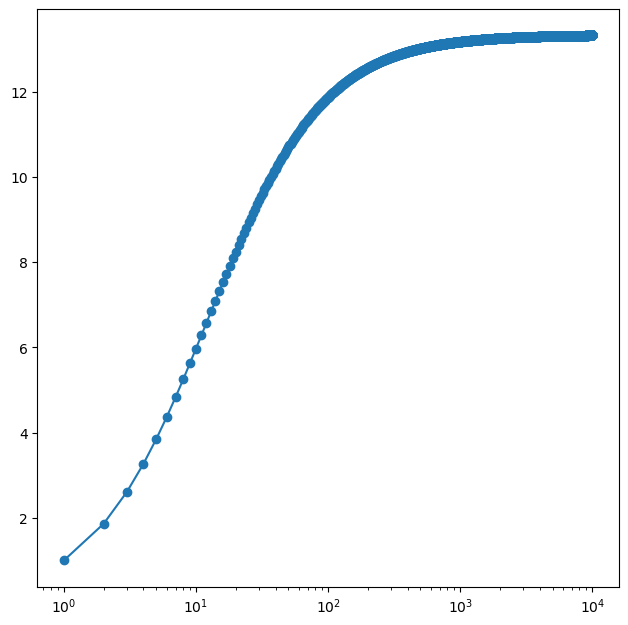

In [27]:
seq = 0.075
par = 1 - seq

cores = np.linspace(1, 10000, 10000)

max_speed = {}

for i in cores:
    max_speed[i] = 1 / (seq + (par/i))

print(max(max_speed.values()))

plt.plot(max_speed.keys(), max_speed.values(), '-o', label=f'Maximum Speedup')
plt.xscale('log')

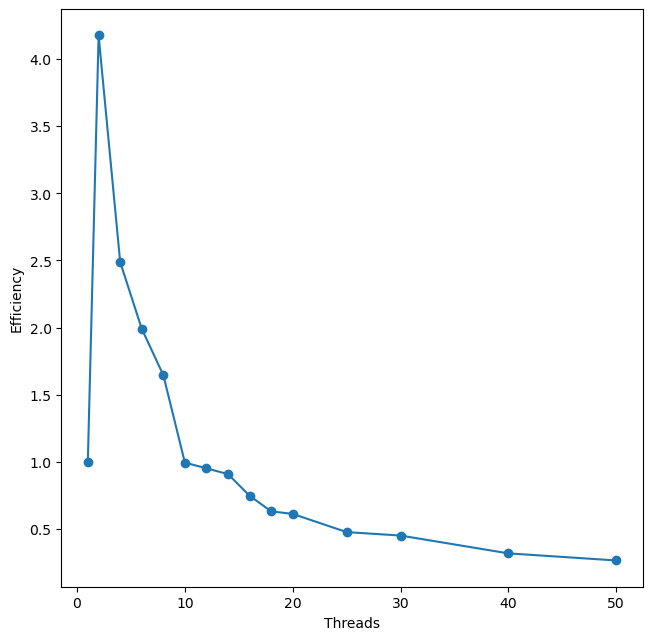

In [19]:
efficiency = {}
for k, v in speedup.items():
    efficiency[k] = v / k
efficiency = dict(sorted(efficiency.items()))
plt.plot(efficiency.keys(), efficiency.values(), '-o')
# plt.plot(efficiency.keys(), [1]*len(efficiency), '--or')
plt.xlabel('Threads')
plt.ylabel('Efficiency')
plt.show()


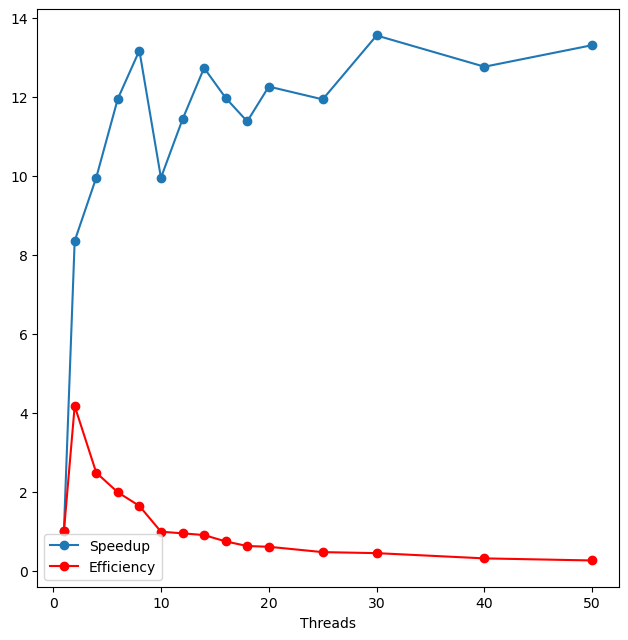

In [25]:

plt.plot(speedup.keys(), speedup.values(), '-o', label='Speedup')
plt.plot(efficiency.keys(), efficiency.values(), '-or', label='Efficiency')
plt.legend()
plt.xlabel('Threads')
# plt.ylabel('Speedup and Efficiency')
plt.show()

In [29]:
seq_time = df.loc[(df['tot_threads']==1) & (df['tot_points']==p) & (df['tot_centroids']==c)]['time_millis']
seq_time.values[0]

2

the *efficiency* of an algorithm using P processors is: EP = SP / P\
*speedup* SP = ts / tP